# STEP 1: IMPORT LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: Load DataSet

In [5]:
df = pd.read_csv("./Datasets/California_Housing.csv")

# STEP 3: Basic EDA

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
# select Numerical values only

numerical_values = df.select_dtypes(include=('float64', 'int64'))
numerical_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
# find correlation  for numerical values only

correlation = numerical_values.corr()['median_house_value'].sort_values(ascending=False)
print(correlation)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


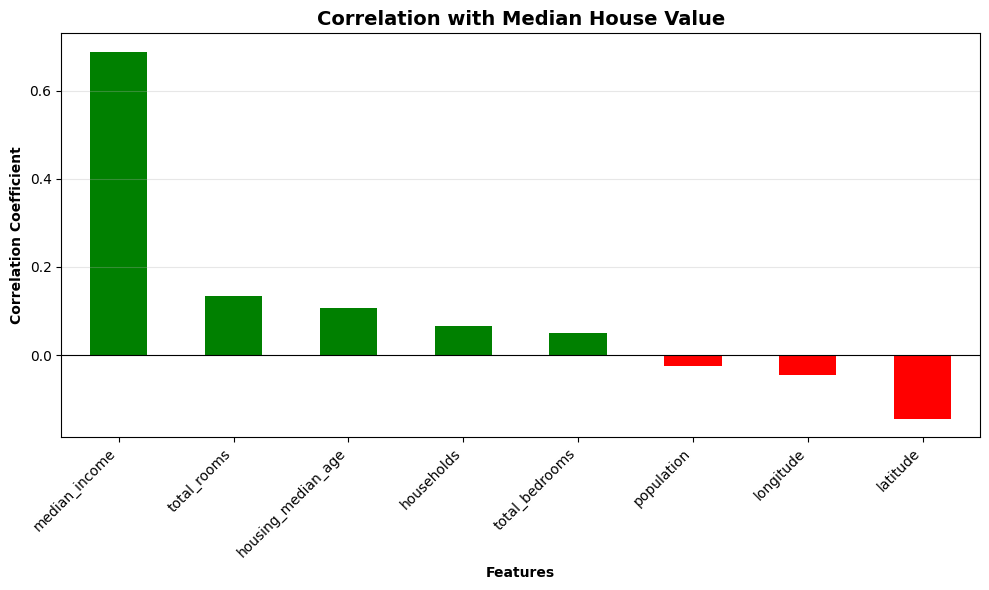

In [12]:
# Visualize correlation
plt.figure(figsize=(10, 6))
correlation.drop('median_house_value').plot(kind='bar', 
                                             color=['green' if x > 0 else 'red' for x in correlation.drop('median_house_value')])
plt.title("Correlation with Median House Value", fontweight='bold', fontsize=14)
plt.ylabel('Correlation Coefficient', fontweight='bold')
plt.xlabel('Features', fontweight='bold')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# STEP 4: DATA PREPROCESSING


In [13]:
missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Count": missing,
    "Missing Percentage": missing_percentage
})

print(missing_df[missing_df['Missing Count'] > 0])

                Missing Count  Missing Percentage
total_bedrooms            207            1.002907


In [14]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [15]:
missing = df.isnull().sum()
missing_percentage = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    "Missing Count": missing,
    "Missing Percentage": missing_percentage
})

print(missing_df[missing_df['Missing Count'] > 0])

Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


# STEP 5: Feature Selection/Preprocessing

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [17]:
X = df.drop(['median_house_value','ocean_proximity'], axis=1, errors='ignore')
y = df["median_house_value"]

In [18]:
X.shape

(20640, 8)

In [19]:
y.shape

(20640,)

# STEP 6: TRAIN-TEST SPLIT

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# STEP 7: Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# STEP 8: RANDOM FOREST WITH DEFAULT PARAMETERS

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaler, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
model.score(X_test_scaler, y_test)

0.8102273824388975

In [27]:
y_pred = model.predict(X_test_scaler)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [29]:
# Evalutation

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae}")
print(f"mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 32095.481630329454
mean Squared Error: 2486797418.7634544
R2 Score: 0.8102273824388975


# STEP 9: Cross-Validation

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
print(f"CV R2 Scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


CV R2 Scores: [0.81230239 0.80716625 0.81619147 0.81441622 0.81407809]
Mean CV R²: 0.8128 (+/- 0.0031)


# STEP 9: FEATURE IMPORTANCE ANALYSIS

In [32]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance)

              Feature  Importance
7       median_income    0.520658
0           longitude    0.156370
1            latitude    0.146093
2  housing_median_age    0.065953
5          population    0.037923
4      total_bedrooms    0.028405
3         total_rooms    0.024630
6          households    0.019968


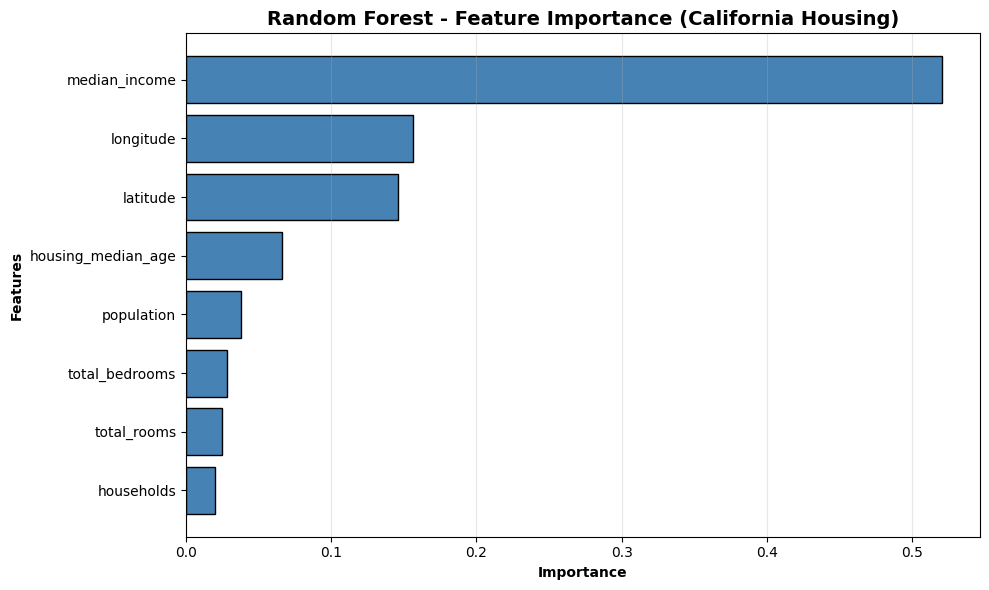

In [33]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], 
         color='steelblue', edgecolor='black')
plt.xlabel('Importance', fontweight='bold')
plt.ylabel('Features', fontweight='bold')
plt.title('Random Forest - Feature Importance (California Housing)', 
          fontweight='bold', fontsize=14)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# STEP 10: HYPERPARAMETER TUNING WITH RANDOMIZEDSEARCH CV

In [34]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [39]:
# Define parameter Distribution

param_dict = {
    'n_estimators': [100,200,300],
    'max_depth': [10,20,30, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(
    estimator = RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_dict,
    n_iter = 30, # 30 random Combination
    cv = 5,
    scoring='r2',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_depth': [10, 20, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': <scipy.stats....0027FC7389990>, 'min_samples_split': <scipy.stats....0027FB9225540>, ...}"
,n_iter,30
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [40]:
print("Best Paramater Found")
print(f"Best n_estimators: {random_search.best_params_['n_estimators']}")
print(f"Best max_depth: {random_search.best_params_['max_depth']}")
print(f"Best min_sample_split: {random_search.best_params_['min_samples_split']}")
print(f"Best min_samples_leaf: {random_search.best_params_['min_samples_leaf']}")
print(f"Best Max_features: {random_search.best_params_['max_features']}")
print(f"Best CV R2 score: {random_search.best_score_:.4f}")

Best Paramater Found
Best n_estimators: 300
Best max_depth: 30
Best min_sample_split: 13
Best min_samples_leaf: 3
Best Max_features: None
Best CV R2 score: 0.8099


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
# Predict with Best Model

y_pred_tuned = random_search.best_estimator_.predict(X_test)

tuned_r2 = r2_score(y_test, y_pred_tuned)
tuned_mse = mean_squared_error(y_test, y_pred_tuned)
tuned_mae = mean_absolute_error(y_test, y_pred_tuned)
tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Tuned R2 Score: {tuned_r2}")
print(f"Tuned Mean Squared Error: {tuned_mse}")
print(f"Tuned Absolute Error: {tuned_mae}")
print(f"Tuned RMSE: {tuned_rmse}")

Tuned R2 Score: 0.8051995084220973
Tuned Mean Squared Error: 2552683131.2942452
Tuned Absolute Error: 32670.89120062325
Tuned RMSE: 49867.79941769493


# STEP 11: SIMPLER TUNING - N_ESTIMATORS ONLY


In [45]:
# test Different Numbers of Trees

n_estimators_list = [50,100,150,200,250,300]
simple_results = []  

print("\nTesting Different n_enstimators values...")
for n in n_estimators_list:
    rf = RandomForestRegressor(n_estimators=n, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    r2 = r2_score(y_test, rf.predict(X_test))
    simple_results.append(r2)
    print(f"n_enstimator={n}: R2 = {r2:.4f}")

# Find best
best_n = n_estimators_list[np.argmax(simple_results)]
best_simple_r2 = max(simple_results)
print(f"Best n_enstimator: {best_n} with R2 = {best_simple_r2:.4f}")


Testing Different n_enstimators values...
n_enstimator=50: R2 = 0.8074
n_enstimator=100: R2 = 0.8101
n_enstimator=150: R2 = 0.8110
n_enstimator=200: R2 = 0.8115
n_enstimator=250: R2 = 0.8121
n_enstimator=300: R2 = 0.8123
Best n_enstimator: 300 with R2 = 0.8123


# STEP 12: MODEL COMPARISON

In [49]:
comparison = pd.DataFrame({
    'Model': ['RF (Default)', 'RF (RandomSearch)', 'RF (Simple Tuning)'],
    'R2 Score': [r2, tuned_r2, best_simple_r2],
    'MAE': [mae, tuned_mae, mean_absolute_error(y_test, RandomForestRegressor(n_estimators=best_n, random_state=42, n_jobs=-1).fit(X_train, y_train).predict(X_test))],
    'RMSE': [rmse, tuned_rmse, np.sqrt(mean_squared_error(y_test, RandomForestRegressor(n_estimators=best_n, random_state=42, n_jobs=-1).fit(X_train, y_train).predict(X_test)))]
})

print("\n")
print(comparison.to_string(index=False))

best_idx = comparison['R2 Score'].idxmax()
print(f"Best Model: {comparison.loc[best_idx, 'Model']}")
print(f"Best R2 Score: {comparison.loc[best_idx, 'R2 Score']:.4f}")

improvement = ((tuned_r2 - r2) / r2) * 100
print(f"Improvement From RandomSearch: {improvement:.2f}%")



             Model  R2 Score          MAE         RMSE
      RF (Default)  0.812301 32095.481630 49867.799418
 RF (RandomSearch)  0.805200 32670.891201 49867.799418
RF (Simple Tuning)  0.812301 32013.328296 49594.536449
Best Model: RF (Default)
Best R2 Score: 0.8123
Improvement From RandomSearch: -0.87%
